# Particle Swarm Demonstration using the Rastrigin Function
Eric Munsing, e.munsing@berkeley.edu, 10/04/16.  Creative Commons.

This demonstrates Particle Swarm Optimization, an agent-based method for optimizing nonlinear functions. The general algorithm is as follows:

- Initialize a swarm of `Particle` objects in our design space, each of which has fields for storing its:
    - Position (randomly assigned)
    - Velocity (randomly assigned)
    - Current cost
    - Best historical cost
    - Best historical position
- Check which `Particle` in our Swarm has the lowest cost, and save its cost and position.

At each epoch,
- Update the location of each particle as a (randomly) weighted combination of its own velocity, the vector to its historical best position, and the vector to the swarm's best position.
- Check whether a particle now has a better position than has been previously seen by the swarm.
    - If so, broadcast the new position to the swarm
End after a predetermined number of epochs has elapsed.


## Background Reading/Information

Here's a good introduction to agent-based optimization methods (with emphasis on Amoeba optimization, particle swarm optimization, and simulated bee colony optimization: https://www.youtube.com/watch?v=bVDX_UwthZI

The code presented here is based on code provided by James McCaffrey, https://jamesmccaffrey.wordpress.com/2015/06/09/particle-swarm-optimization-using-python/

## Optimizing the Rastrigin function:
We consider the following sample function, which is highly nonlinear and provides a good test for nonlinear optimization algorithms:

$ \min \quad f(\mathbf {x} )=An+\sum _{i=1}^{n}\left[x_{i}^{2}-A\cos(2\pi x_{i})\right] $

This has many local minima, but a global minimum of $f(x)=0$ at $x=0$

In [49]:
import numpy as np
import copy, sys
import sys     # max float

import matplotlib.pyplot as plt
% matplotlib inline

In [59]:
def cost(x):    
    # This computes the cost (value of objective function) for a given point in our objective space
    dim = len(x)
    cost = 10*dim + np.sum( np.multiply(x,x) - 10*np.cos(2*np.pi*x))
    return cost

class Particle:
    def __init__(self, minx, maxx, seed):
        # Assumes that minx and maxx are arrays or vectors with len()=n
        self.rnd = np.random.seed(seed)
        dim = len(maxx)

        self.position = (maxx - minx) * np.random.rand(dim) + minx
        self.velocity = (maxx - minx) * (np.random.rand(dim)-0.5)

        self.error = cost(self.position) # curr error
        self.best_part_pos = copy.copy(self.position) 
        self.best_part_err = self.error # best error

def Solve(max_epochs, n, minx, maxx):
    # max_epochs: Number of simulation epochs, i.e. flight time steps
    # n : Number of particles
    # minx, maxx: Assuming that the simulation is in a hypercube defined by the range (minx, maxx) in each dimension

    ## Initialization
    w = 0.729    # inertia
    c1 = 1.49445 # cognitive (particle)
    c2 = 1.49445 # social (swarm)
    dim = len(minx)

    # create n random particles, stored in an array named Swarm
    swarm = [Particle( minx, maxx, i) for i in range(n)] 

    ## Identify the best value reported from the initial batch
    best_swarm_err = 1000 # High initial value    
    for i in range(n): # See what the actual best position is in the swarm
        if swarm[i].error < best_swarm_err:
            best_swarm_err = swarm[i].error
            best_swarm_pos = copy.copy(swarm[i].position) 

    epoch = 0
    
    # Save position of a selected particle
    track = 5
    trackData = np.zeros([max_epochs+1, dim])
    trackData[epoch] = swarm[track].position
    
    while epoch < max_epochs:
        
        for i in range(n): # process each particle

            # compute new velocity of curr particle, in each dimension
            r1 = np.random.rand(dim)    # uniform randomizations in the range 0-1
            r2 = np.random.rand(dim)

                # New velocity = w * inertia + c1 * own best + c2 * swarm best
            swarm[i].velocity = ( (w * swarm[i].velocity) + 
                                  (c1 * r1 * (swarm[i].best_part_pos - swarm[i].position)) +  
                                  (c2 * r2 * (best_swarm_pos - swarm[i].position))  )

            # compute new position using new velocity
            swarm[i].position = swarm[i].position + swarm[i].velocity

            # compute error of new position
            swarm[i].error = cost(swarm[i].position)

            # is new position a new best for the particle?
            if swarm[i].error < swarm[i].best_part_err:
                swarm[i].best_part_err = swarm[i].error
                swarm[i].best_part_pos = copy.copy(swarm[i].position)

            # is new position a new best overall?
            if swarm[i].error < best_swarm_err:
                best_swarm_err = swarm[i].error
                best_swarm_pos = copy.copy(swarm[i].position)
            # END OF PARTICLE LOOP
        
        if epoch % 10 == 0:
            print("Epoch = " + str(epoch) + " best error = %.3f" % best_swarm_err)

        # END OF EPOCH LOOP
        epoch += 1
        trackData[epoch] = swarm[track].position
    
    return (best_swarm_pos, trackData)
# end Solve

In [65]:
## This is the main execution

num_particles = 50
max_epochs = 100
minx = np.array( [-4, -4] )
maxx = np.array( [ 4,  4] )

print("Starting PSO algorithm")

(best_position, trackData) = Solve(max_epochs, num_particles, minx, maxx)

print("PSO completed \nBest solution found:")
print(best_position)
print("Error of best solution = %.6f" % cost(best_position))


Starting PSO algorithm
Epoch = 0 best error = 4.449
Epoch = 10 best error = 0.045
Epoch = 20 best error = 0.045
Epoch = 30 best error = 0.000
Epoch = 40 best error = 0.000
Epoch = 50 best error = 0.000
Epoch = 60 best error = 0.000
Epoch = 70 best error = 0.000
Epoch = 80 best error = 0.000
Epoch = 90 best error = 0.000
PSO completed 
Best solution found:
[ -4.41209744e-07   4.68262572e-07]
Error of best solution = 0.000000


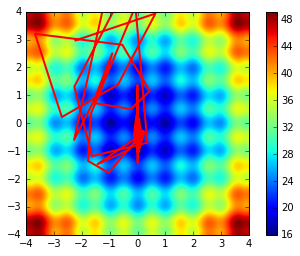

In [64]:
# Plot the Rastrigin function and the path taken by the tracked particle
lim = 4  # We will plot the Rastrigin function in an x-y square centered at 0 with this as the max value 
stepsize = 0.01
x_axis = np.linspace(-lim,lim,lim/stepsize+1)
y_axis = np.linspace(-lim,lim,lim/stepsize+1)
x,y = np.meshgrid(x_axis, y_axis)  # This produces arrays of the same size which will vary in x and y appropriately
f = 20 + np.multiply(x,x) + np.multiply(y,y) - 2*np.cos(2*np.pi*x) - 2*np.cos(2*np.pi*y)
plt.plot(trackData[:,0],trackData[:,1],'r',lw=2)
plt.imshow(f, extent = [-lim, lim, -lim, lim])
plt.xticks(np.linspace(-lim,lim,2*lim+1))
plt.yticks(np.linspace(-lim,lim,2*lim+1))
plt.colorbar()